In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import graphviz
import matplotlib.pyplot as plt
import numpy as np


In [4]:
# Load your Titanic dataset - update the path as needed
titanic = pd.read_csv(r"C:\Desktop\titanic_cleaned.csv")

# See the column names to verify
print(titanic.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [6]:
# Select relevant columns for modeling
titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]

# Fill missing Age values
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

# Encode 'Sex' column (0/1)
le_sex = LabelEncoder()
titanic['Sex'] = le_sex.fit_transform(titanic['Sex'])

# Features and target
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Preprocessing done. Data split into train and test sets.")


Preprocessing done. Data split into train and test sets.


C:\Users\sathv\AppData\Local\Temp\ipykernel_13796\2012440130.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
C:\Users\sathv\AppData\Local\Temp\ipykernel_13796\2012440130.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Age'].fillna(titanic['Age'].median(), inplace=Tru

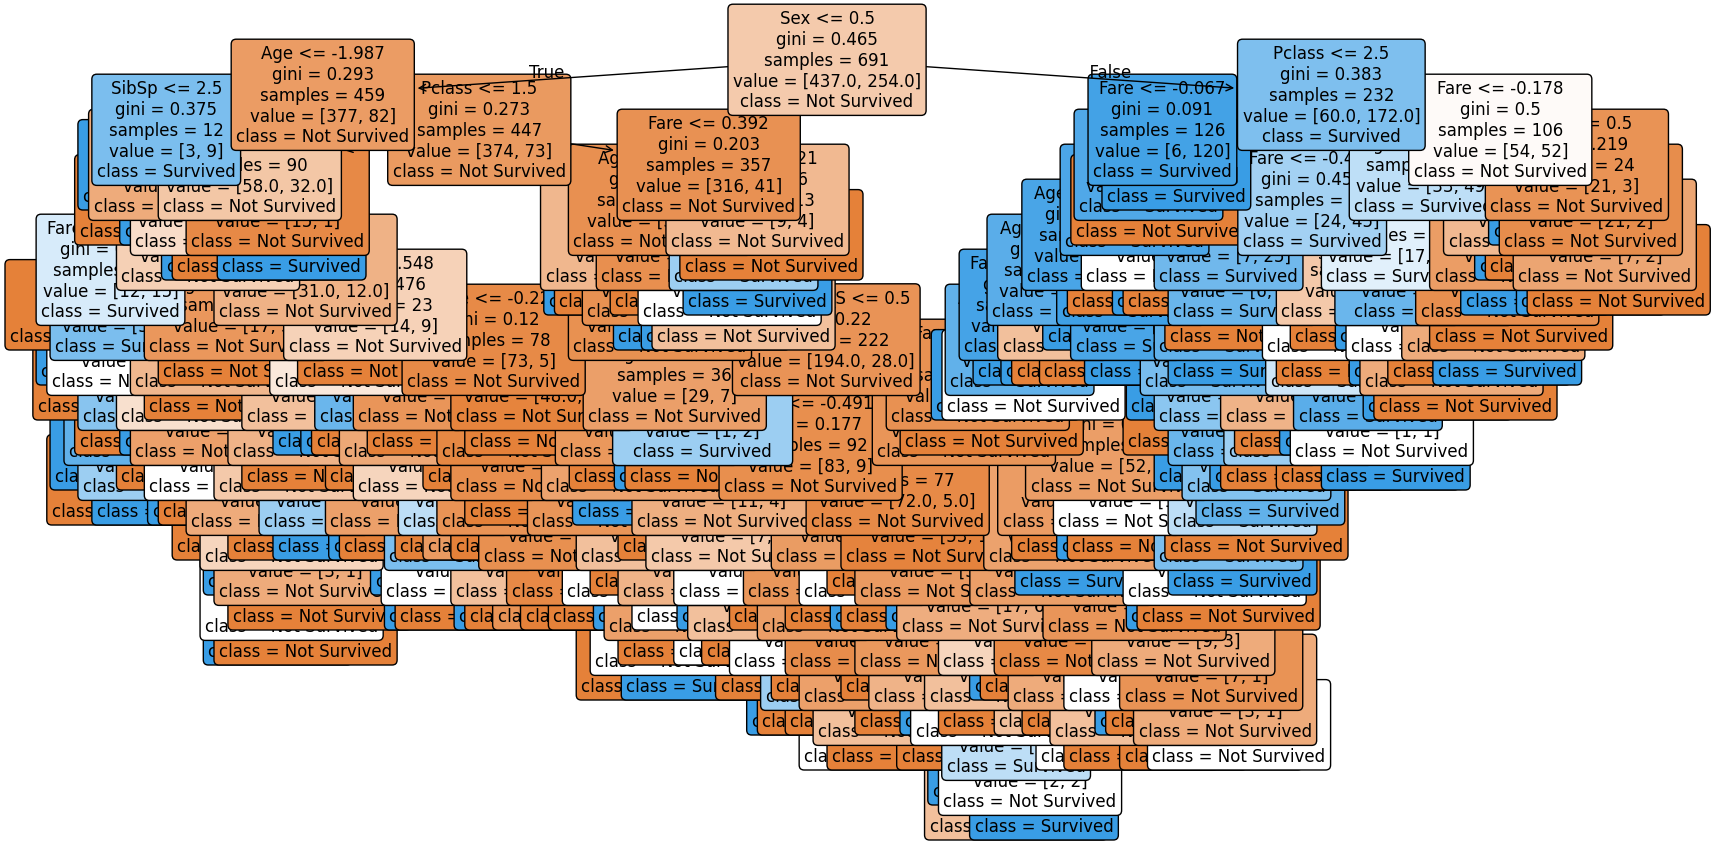

In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Visualize the tree using plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True, fontsize=12)
plt.show()


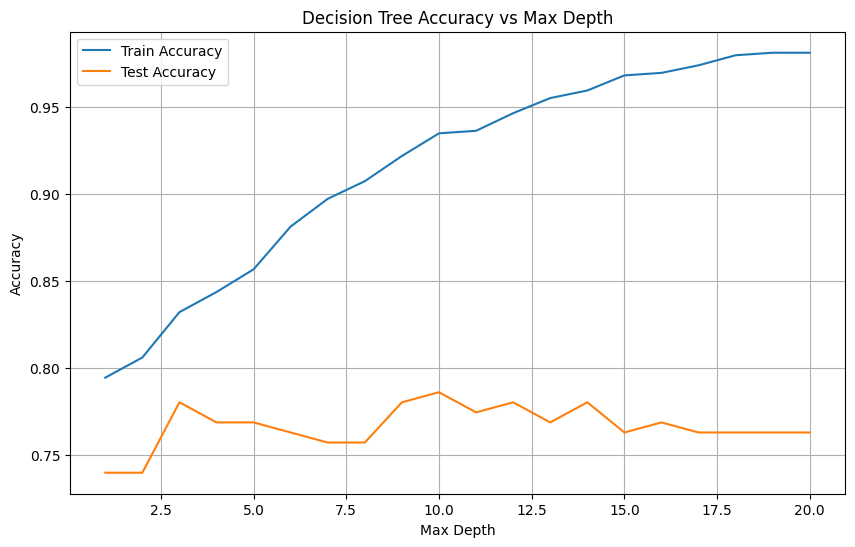

In [9]:
train_acc = []
test_acc = []
depth_range = range(1, 21)

for depth in depth_range:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    train_acc.append(dt.score(X_train, y_train))
    test_acc.append(dt.score(X_test, y_test))

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(depth_range, train_acc, label='Train Accuracy')
plt.plot(depth_range, test_acc, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs Max Depth')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Accuracy scores
dt_train_acc = dt.score(X_train, y_train)
dt_test_acc = dt.score(X_test, y_test)
rf_train_acc = rf.score(X_train, y_train)
rf_test_acc = rf.score(X_test, y_test)

print(f"Decision Tree Train Accuracy: {dt_train_acc:.4f}")
print(f"Decision Tree Test Accuracy: {dt_test_acc:.4f}")
print(f"Random Forest Train Accuracy: {rf_train_acc:.4f}")
print(f"Random Forest Test Accuracy: {rf_test_acc:.4f}")


Decision Tree Train Accuracy: 0.9812
Decision Tree Test Accuracy: 0.7630
Random Forest Train Accuracy: 0.9826
Random Forest Test Accuracy: 0.7746


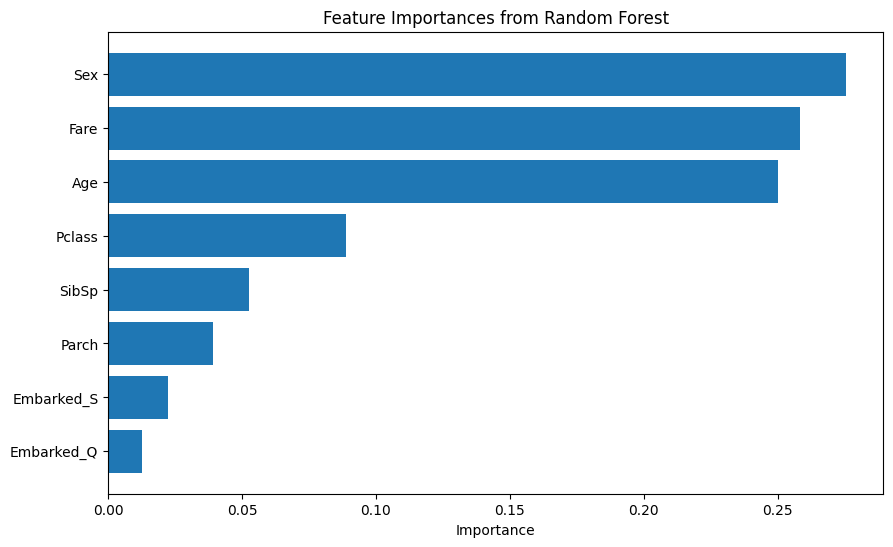

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from Random Forest
importances = rf.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
feat_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10,6))
plt.barh(feat_importance['Feature'], feat_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.show()


In [12]:
from sklearn.model_selection import cross_val_score

# Cross-validation with Decision Tree
dt_cv_scores = cross_val_score(DecisionTreeClassifier(max_depth=5, random_state=42), X, y, cv=5)
print(f"Decision Tree CV Accuracy: {dt_cv_scores.mean():.4f} ± {dt_cv_scores.std():.4f}")

# Cross-validation with Random Forest
rf_cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42), X, y, cv=5)
print(f"Random Forest CV Accuracy: {rf_cv_scores.mean():.4f} ± {rf_cv_scores.std():.4f}")


Decision Tree CV Accuracy: 0.8091 ± 0.0200
Random Forest CV Accuracy: 0.8021 ± 0.0247
